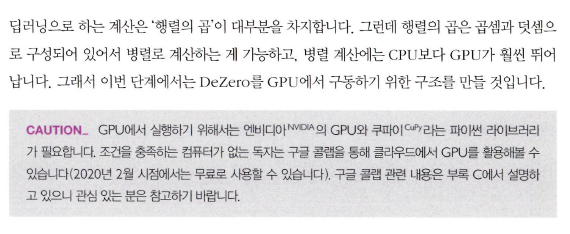

https://docs.cupy.dev/en/latest/install.html#install-cupy

CUPY 다운 링크

ex) CUDA 버전에 맞는 CUPY를 다운 만약 CUDA 버전이 11.2 이면

**pip install cupy-cuda112**

In [6]:
import cupy as cp

x = cp.arange(6).reshape(2, 3)
print(x)

y = x.sum(axis=1)
print(y)

[[0 1 2]
 [3 4 5]]
[ 3 12]


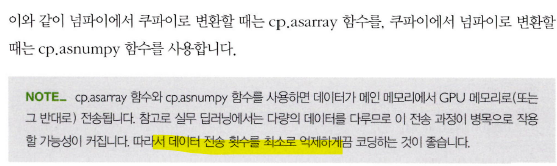

In [10]:
import numpy as np
import cupy as cp

# 넘파이 -> 쿠파이
n = np.array([1, 2, 3])
c = cp.asarray(n)
assert type(c) == cp.ndarray

# 넘파이 -> 쿠파이
c = cp.array([1, 2, 3])
n = cp.asnumpy(c)
assert type(n) == np.ndarray
#assert type(n) == cp.ndarray <- error

In [11]:
# x가 넘파이 배열인 경우
x = np.array([1, 2, 3])
xp = cp.get_array_module(x)
assert xp== np

# x가 쿠파이 배열인 경우
x = cp.array([1, 2, 3])
xp = cp.get_array_module(x)
assert xp == cp

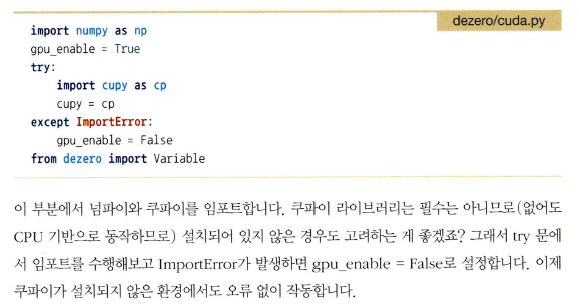

### dezero/cuda.py를 보면
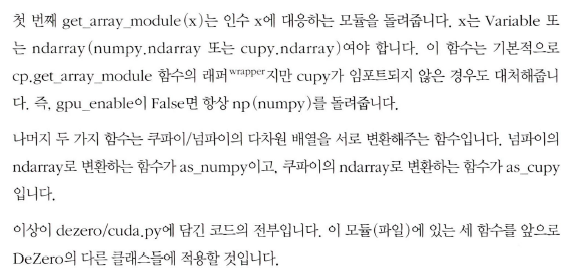

# MNIST 학습하기

In [3]:
if '__file__' in globals():
    import os, sys
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
import time
import dezero
import dezero.functions as F
from dezero import optimizers
from dezero import DataLoader
from dezero.models import MLP


max_epoch = 5
batch_size = 100

train_set = dezero.datasets.MNIST(train=True)
train_loader = DataLoader(train_set, batch_size)
model = MLP((1000, 10))
optimizer = optimizers.SGD().setup(model)

# GPU mode

if dezero.cuda.gpu_enable:
    train_loader.to_gpu()
    model.to_gpu()

for epoch in range(max_epoch):
    start = time.time()
    sum_loss = 0

    for x, t in train_loader:
        # x -> (100, 784) , t -> (100, )
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()
        sum_loss += float(loss.data) * len(t)

    elapsed_time = time.time() - start
    print('epoch: {}, loss: {:.4f}, time: {:.4f}[sec]'.format(
        epoch + 1, sum_loss / len(train_set), elapsed_time))

epoch: 1, loss: 1.9098, time: 7.4500[sec]
epoch: 2, loss: 1.2832, time: 7.1913[sec]
epoch: 3, loss: 0.9262, time: 7.6524[sec]
epoch: 4, loss: 0.7420, time: 7.8761[sec]
epoch: 5, loss: 0.6369, time: 7.3080[sec]
